Exercise 1

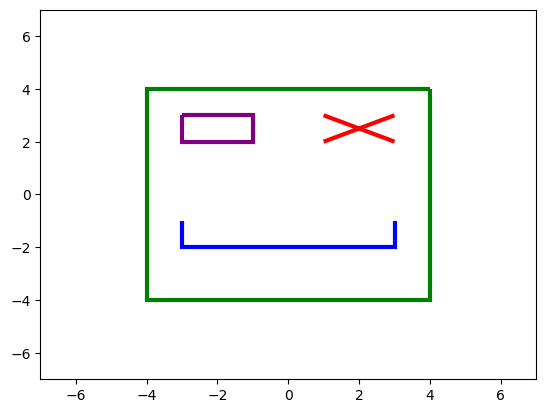

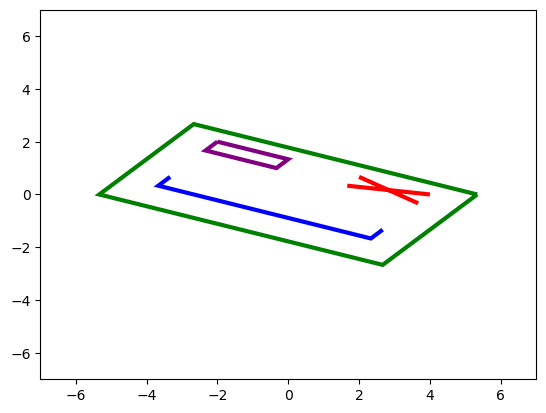

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

#Function to perform matrix multiplicaiton
def transform(points):
    points_transformed=np.matmul(A,points.T).T
    return points_transformed

#Function to plot points on graph
def plot_shapes(points,code,colour):
    path=Path(points,code)
    patch= patches.PathPatch(path,color=colour,lw=3,fill=False)
    ax.add_patch(patch)
    
#Assigning a,b
a=4
b=3

#Matrix A
A = np.matrix([[1,1/b],[-1/b,1/b]])

#Paths for patches
path1=[Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.LINETO]
path2=[Path.MOVETO,Path.LINETO,Path.MOVETO,Path.LINETO]
path3=[Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO]

#Points
part1_points=np.matrix([[a,a],[a,-a],[-a,-a],[-a,a],[a,a]])
part2_points=np.matrix([[1-a,a-1],[-a/4,a-1],[-a/4,a/2],[1-a,a/2],[1-a,a-1]])
part3_points=np.matrix([[a/4,a-1],[a-1,a/2],[a-1,a-1],[a/4,a/2]])
part4_points=np.matrix([[a-1,-a/4],[a-1,-a/2],[1-a,-a/2],[1-a,-a/4]])

#Set parameters for the plot
before_transformation = plt.figure()
ax = before_transformation.add_subplot(111)
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)

#Plot the original points
plot_shapes(part1_points,path1,"green")
plot_shapes(part2_points,path1,"purple")
plot_shapes(part3_points,path2,"red")
plot_shapes(part4_points,path3,"blue")
plt.show()

#Set parameters for the plot
after_transformation = plt.figure()
ax = after_transformation.add_subplot(111)
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)

#Plot the transformed points
plot_shapes(transform(part1_points),path1,"green")
plot_shapes(transform(part2_points),path1,"purple")
plot_shapes(transform(part3_points),path2,"red")
plot_shapes(transform(part4_points),path3,"blue")
plt.show()





Exercise 2

When H = 1
   X        Y
0  0 -3.00000
1  1 -3.60000
2  2 -3.32000
3  3 -1.98400
4  4  0.61920
5  5  4.74304
        
When H = 0.2
      X         Y
0   0.0 -3.000000
1   0.2 -3.120000
2   0.4 -3.204800
3   0.6 -3.252992
4   0.8 -3.263112
5   1.0 -3.233636
6   1.2 -3.162982
7   1.4 -3.049501
8   1.6 -2.891481
9   1.8 -2.687140
10  2.0 -2.434626
11  2.2 -2.132011
12  2.4 -1.777291
13  2.6 -1.368383
14  2.8 -0.903118
15  3.0 -0.379243
16  3.2  0.205587
17  3.4  0.853811
18  3.6  1.567963
19  3.8  2.350682
20  4.0  3.204709
21  4.2  4.132898
22  4.4  5.138213
23  4.6  6.223742
24  4.8  7.392692
25  5.0  8.648399
        
When H = 0.05
   X        Y
0  0 -3.00000
1  1 -3.60000
2  2 -3.32000
3  3 -1.98400
4  4  0.61920
5  5  4.74304
        


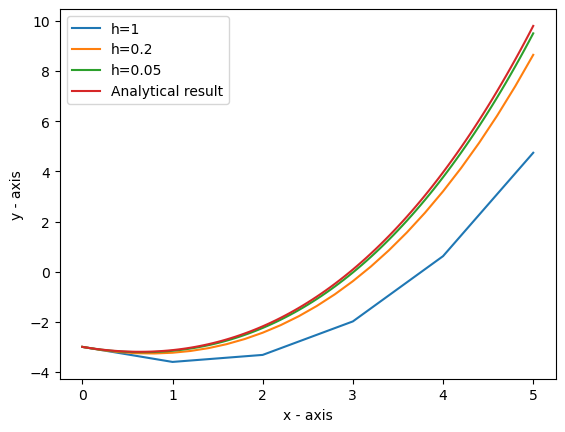

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd


#ODE function
def f(x,y):
    return x+(y/5)

#y function
def y(x):
    return (22*(math.e**(x/5)))-(5*x)-25

def analystical_results(x0,y0,x_end,h=0.05):
    #Array containing all the x values is created\n",
    x_arr = np.arange(x0, x_end + h, h)
    #Array to contain all the y values is created
    #The array will be the same size as the Array containing the x values
    y_arr = np.zeros(x_arr.shape)
    #First element in the array containng the y values is assigned to be the inital y value
    y_arr[0] = y0
    #y-values are caluclated
    for i in range(1,x_arr.size):
        y_arr[i]=y(x_arr[i])
    return x_arr, y_arr

def euler(x0,y0,x_end,h):
    #Array containing all the x values is created\n",
    x_arr = np.arange(x0, x_end + h, h)
    #Array to contain all the y values is created 
    #The array will be the same size as the Array containing the x values
    y_arr = np.zeros(x_arr.shape)
    #First element in the array containng the y values is assigned to be the inital y value\n",
    y_arr[0] = y0
    #y-values are caluclated\n",
    for i, x in enumerate(x_arr[:-1]):
        y_arr[i+1] = y_arr[i] + h*f(x, y_arr[i])
    return x_arr,y_arr

#Intial conditions
x0, y0 = 0, -3

#Step sizes
h1, h2, h3 = 1, 0.2, 0.05

#the value of x for which we want to know y with each given step size
x_end=5

print("When H = 1")
x1_arr,y1_arr=euler(x0,y0,x_end,h1)
print(pd.DataFrame(list(zip(x1_arr, y1_arr)), columns=['X', 'Y']))
print("        ")
    
print("When H = 0.2")
x2_arr,y2_arr=euler(x0,y0,x_end,h2)
print(pd.DataFrame(list(zip(x2_arr, y2_arr)), columns=['X', 'Y']))
print("        ")
     
print("When H = 0.05")
x3_arr,y3_arr=euler(x0,y0,x_end,h3)
print(pd.DataFrame(list(zip(x1_arr, y1_arr)), columns=['X', 'Y']))
print("        ")
    
#drawing a graph with the numerical results
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(x1_arr,y1_arr, label="h=1")
plt.plot(x2_arr,y2_arr, label ="h =0.2")
plt.plot(x3_arr,y3_arr, label="h=0.05")
#drawing a graph of exact values (analytical result)
exact_x,exact_y=analystical_results(x0,y0,x_end)
plt.plot(exact_x,exact_y, label = "analystical result")
plt.legend(("h=1","h=0.2","h=0.05","Analytical result"))

Conculsion:

    - The smaller the values of H, the closer the numerical values for y are closer to the analytical (exact) values for y.
    - The local error (error per step) is proportional to the square of the step size, and the global error (error at a given time) is proportional to the step size.
    - The euler method is used for approximating solutions to differential equations and works by approximating a solution curve with line segments, the smaller the segments(values of h) the more accurate the line is to the exact solution line.
    - Furthermore eulers mehtod will always provide an underestimate for y values, hence all the analytical values of y will fall below the exact values.

Solving dy/dx = x + y/5

Step 1:
    - Write the differential equation in the form dy/dx + P(x)y = Q(x)
    - Q(x) = x
    - P(x) = 1/5

Step 2:
    - Find the integrating factor, U(x)
    - U(x) = e^(∫P(x)dx
    - U(x) = e^(∫1/5 dx)
    - U(x) = e^(1/5x)

Step 3:

    - Multiply both sides of the differential equation by the integrating factor
    - e^(1/5x) dy/dx + (1/5)e^(1/5x) y = xe^(1/5x)

Step 4:

    - Identify the left-hand side of the equation is the product of the integrating factor and the derivative of y with respect to x
    - (d/dx)(e^(1/5x) y) = xe^(1/5x)

Step 5:

    - Integrate both sides with respect to x
    - e^(1/5x) y = ∫xe^(1/5x)dx = 5xe^(1/5x) - 25e^(1/5x) + C

Step 6:

    - Solve for y
    - y = (5xe^(1/5x) - 25e^(1/5x) + C) / e^(1/5x)

Step 7:

    - Using the initial condition (y(0) = -3) find the value of the constant
    - -3 = (5(0)e^(1/5(0)) - 25e^(1/5(0)) + C) / e^(1/5(0))
    - -3 = (-25 + C) / 1
    - C = -22

Answer:

y = (5xe^(1/5x) - 25e^(1/5x) - 22) / e^(1/5x)



